<h2><center><font color=#D40004><u>One vs All - Perceptron </u></font></center></h2>
<h3><center>Groupe: Mohammed NECHBA, Yassine SEDJARI, Mohammed MOUHAJIR </center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 
<center> Prof. Abdellatif EL AFIA</center>

# <font color='green'><u> Table of Contents:</u></font> <br>

<font color = 'blue'>
    
1. [Importing/Loading & checking the data.](#1)

1. [Gradient Descent & Perceptron.](#2)

1. [Training & Testing for data linear separable.](#3)

<a id = "1"></a><br>
# <font color="green"><u> I. Importing/Loading & Visualize the data:</u></font>

In [2]:
# numpy pour les opérations d'algébre linéaire sur les vecteurs et les matrices.
import numpy as np
# calculations
import math
# plotting vizualisation
import matplotlib.pyplot as plt
# pandas for read dataset
import pandas as pd
#plt.style.use('dark_background')

In [3]:
df_l_s = pd.read_csv("linearly_separable.csv")
df_l_s_n = pd.read_csv("linearly_separable_noise.csv")
df_n_l_s = pd.read_csv("no_linearly_separable.csv")

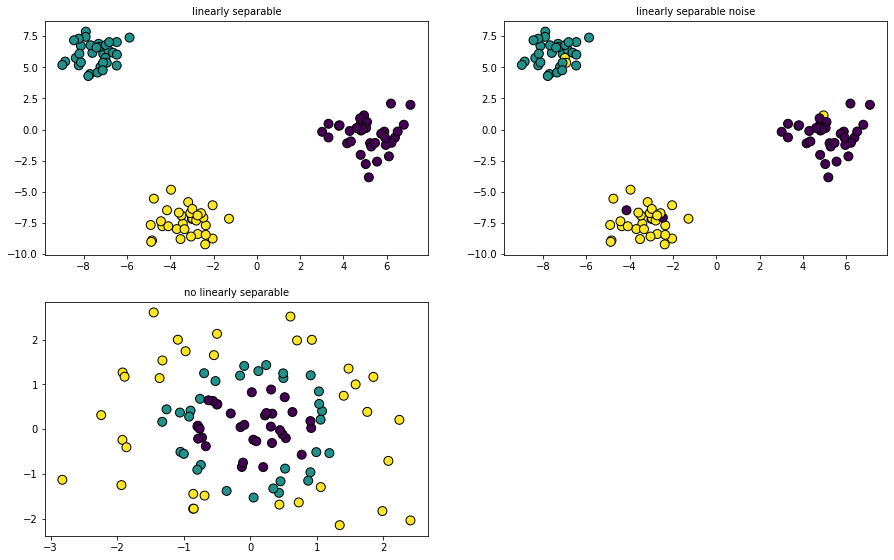

In [4]:
fig= plt.figure(figsize=(13, 13))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("linearly separable", fontsize="medium")
X1, Y1 = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(322)
plt.title("linearly separable noise", fontsize="medium")
X1, Y1 = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(323)
plt.title("no linearly separable", fontsize="medium")
X2, Y2 =df_n_l_s[['x1','x2']].to_numpy(), df_n_l_s['y'].to_numpy()
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=80, edgecolor="k")


In [5]:
def plot2D( X,y,w_list):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[1])
        y1.append(point[2])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=100 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=1
    for w in w_list:
        alpha = -w[1]/w[2]
        beta = -w[0]/w[2]
        decision_boundary = lambda x : alpha*x + beta
        if i==1:
            x2 = np.array([-3,2])
        else:
            x2 = np.array([-9,6])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "classifier "+str(i))
        i+=1
    plt.legend()


<a id = "2"></a><br>
# <font color="green"><u> II.Perceptron:</u></font>

In [6]:
def _get_cls_map(y):
    # chagement des labels y=0 en y=-1 de notre base de donnée
    return np.where(y <= 0, -1, 1)



def indecatrice(w, x, y):
    if np.sign(np.dot(w, x)) != y:
        return 1
    return 0

def Ls(w, x, y):
    n = len(y)
    s = 0
    for i in range(n):
        s += indecatrice(w, x[i], y[i])
    return s/n

def PLA(w,X, y):
    y = _get_cls_map(y)
    
    while Ls(w, X, y) != 0:
        for i in range(len(y)):
            estimator = np.dot(w, X[i])
            if np.sign(estimator)*y[i] <= 0:
                w += y[i]*X[i]
                
                # À chaque modification de wt on afficher l'erreur d'approximation.
                
                

    # Assigner les valeurs optimales
    return w

<a id = "3"></a><br>
# <font color="green"><u> III. Training & Testing for data linear separable:</u></font>

> ## Training

In [7]:
x, y = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()

In [8]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [9]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [10]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [11]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
for c in range(0, numLabels):
    label = (y == c).astype(int)
    initial_w = np.ones(X.shape[1])
    classifiers[c, :] = PLA(initial_w,X,label)


In [12]:
classifiers

array([[ -1.        ,  11.30723011,   1.28548583],
       [  2.        ,  -7.12753433,   7.72755429],
       [-10.        ,  -6.8389183 , -10.47982186]])

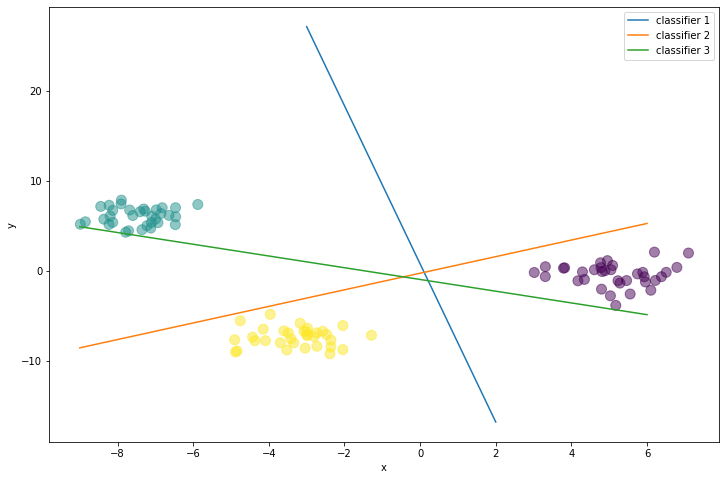

In [13]:
plot2D( X,y,classifiers)

>## Predictions

In [14]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [15]:
# Nous pouvons connaître les prédictions de notre modèle en sélectionnant simplement l'étiquette 
# avec la probabilité la plus élevée dans chaque ligne :
predictions = classProbabilities.argmax(axis=1)

>## Accuracy

In [16]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 100.0%
